# Inspect the minority dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from utils.minority_dataset import load_celeba

## Load the original dataset

In [2]:
input_dim = (128, 128, 3)
batch_size = 128

data_folder = os.path.join('..', 'datasets', 'celeba')
image_folder = os.path.join(data_folder, 'img_align_celeba')
min_df_path = os.path.join('..', 'results', 'vae', 'celeba_v1', 'minority_21', 'minority_dataset.csv')

orig_df = pd.read_csv(os.path.join(data_folder, 'list_attr_celeba.csv'))
orig_data_flow = load_celeba(orig_df, image_folder, input_dim[:2], batch_size)
orig_df.head()

Found 202599 validated image filenames.


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


## Load the minority dataset

In [3]:
min_df = pd.read_csv(min_df_path)
min_data_flow = load_celeba(min_df, image_folder, input_dim[:2], batch_size)
min_df.head()

Found 42143 validated image filenames.


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000020.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,000024.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,1,1,-1,1
4,000030.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1


## Plot both and check differences visually

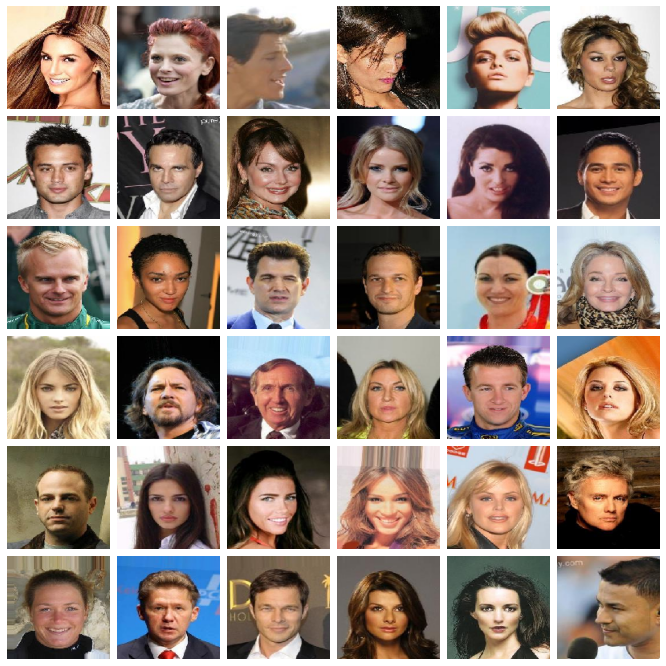

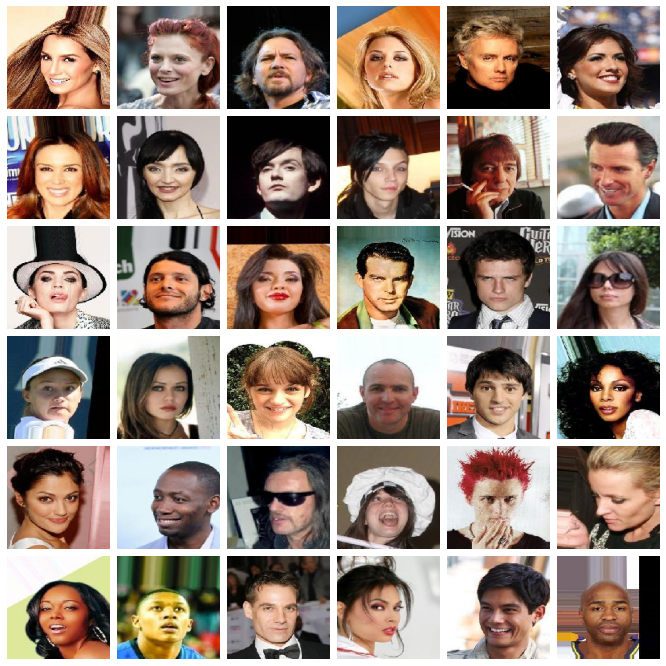

In [4]:
# Get sample data.
minority_images = next(min_data_flow)[0]
original_images = next(orig_data_flow)[0]

# Reference: https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

fig_size = (12., 12.)
nrows_ncols = (6, 6)
n_to_show = 36

"""
The original dataset.
"""

fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111,
                 nrows_ncols=nrows_ncols,
                 axes_pad=0.1,
                 )
image_list = [original_images[i] for i in range(n_to_show)]

for ax, im in zip(grid, image_list):
    ax.imshow(im)
    ax.axis('off')

plt.show()
print(3*'\n')
    
"""
The minority dataset.
"""

fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111,
                 nrows_ncols=nrows_ncols,
                 axes_pad=0.1,
                 )
image_list = [minority_images[i] for i in range(n_to_show)]

for ax, im in zip(grid, image_list):
    ax.imshow(im)
    ax.axis('off')

plt.show()

## Check differences in label percentages

In [5]:
min_mean = min_df.iloc[:, 1:].mean()
orig_mean = orig_df.iloc[:, 1:].mean()

combined = pd.concat([orig_mean, min_mean], axis=1)
# Convert mean to percentages
for i in range(2):
    combined.iloc[:, i] = combined.iloc[:, i].map(lambda x: (x + 1)*50)
combined.columns = ['Original', 'Minority']

combined['Difference'] = combined.Minority - combined.Original
combined

,Original,Minority,Difference
5_o_Clock_Shadow,11.113579,11.297250,0.183671
Arched_Eyebrows,26.698059,22.105688,-4.592371
Attractive,51.250500,45.746625,-5.503875
Bags_Under_Eyes,20.457159,21.199250,0.742091
Bald,2.244335,2.453551,0.209216
Bangs,15.157528,14.885034,-0.272494
Big_Lips,24.079586,24.485680,0.406094
Big_Nose,23.453225,25.413473,1.960248
Black_Hair,23.925093,27.181264,3.256170
Blond_Hair,14.799185,9.690815,-5.108370
